# Lausanne Marathon Data Analysis for Viz Designs

In this notebook, we briefly present our data analysis which provides us lots of inspiration and evidences for the data visualization designs.

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
df_marathon = pd.read_csv('../data/marathon_data.csv')
df_marathon.head()

,name,birth year,age,age group,gender,race year,category,rank,time,city,canton,country,latitude,longitude
0,Aarskog Kay-Morten,1981,36,30-40,male,2017,10,676.,1:15:48.7,Oteren,Troms,NO,69.255568,19.884419
1,Haaland Arne Kristoffer,1981,36,30-40,male,2017,21,179.,1:37:17.0,Oteren,Troms,NO,69.255568,19.884419
2,Abadie Théo,1994,23,20-30,male,2017,21,484.,2:03:37.1,Ecublens,VD,CH,46.529636,6.561525
3,Alves Maria,1978,39,30-40,female,2017,10,315.,0:56:25.6,Ecublens,VD,CH,46.529636,6.561525
4,Angües José,1993,24,20-30,male,2017,10,423.,0:52:59.6,Ecublens,VD,CH,46.529636,6.561525


---
### Runner distribution by race year and category (Donut chart)

First of all, we have a look at the runner distribution of the 3 different races for each year. From the bar plot below, we can easily found that the number of runners who participate in 10km and 21km marathon increase a lot from 2002 to 2017. While less and less people participate in the 42km marathon over year, although the variation is not evident.

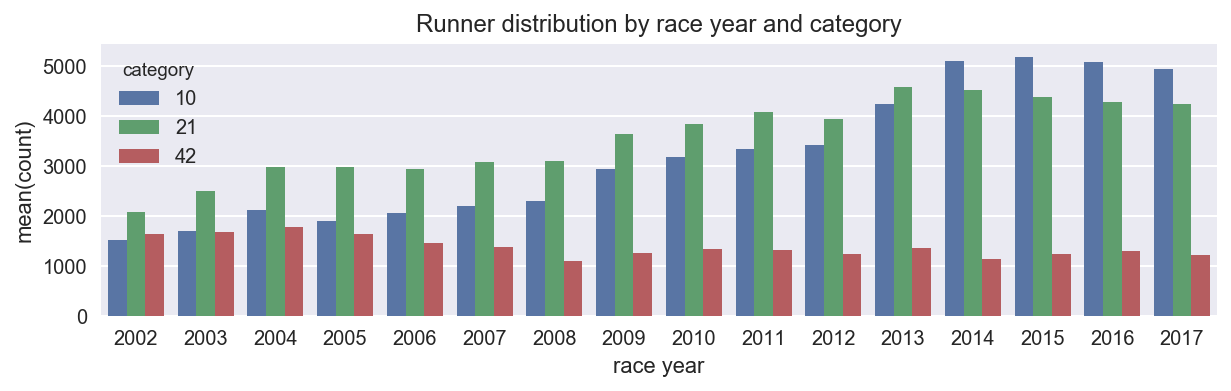

In [30]:
# Group by
df_count_by_year_cat = pd.DataFrame(df_marathon.groupby(['race year','category'])['name'].count())
df_count_by_year_cat.columns = ['count']
df_count_by_year_cat = df_count_by_year_cat.reset_index()

# Plot
f, axes = plt.subplots(1, 1, figsize = (10,2.5), sharex = True, sharey = True)
ax = sns.barplot(x='race year', y='count', hue='category', data=df_count_by_year_cat)
ax.set_title('Runner distribution by race year and category')

Then, we plot separately the female and male runner distribution of the 3 races in order to find out if the variation tendency and the runner distribution of the 3 races are the same as the plot above for both males and females.

From the plots below, we can roughly conclude that the variation tendency of all the races are very similar. However, the runner distribution of the 3 races are totally different.

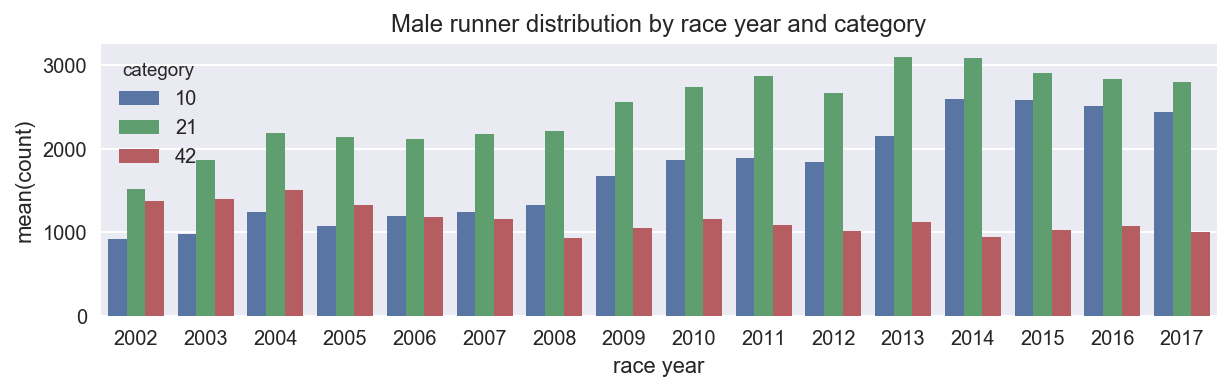

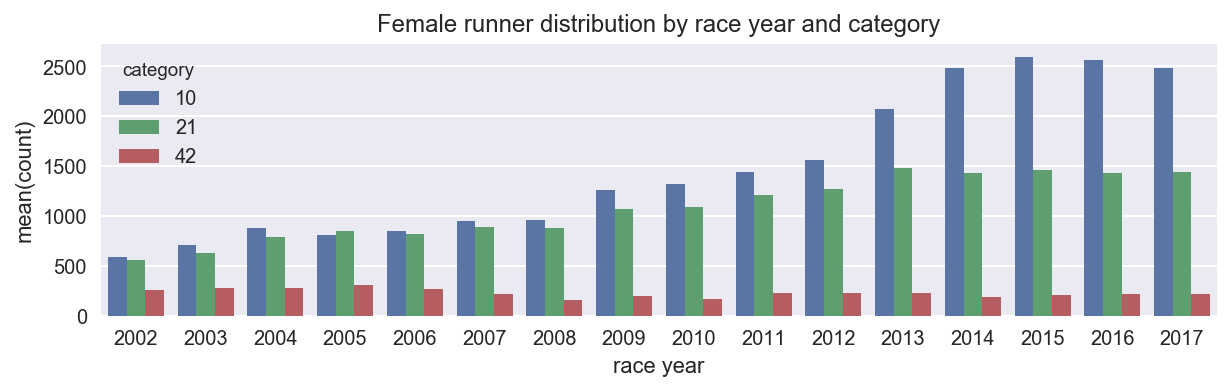

In [31]:
# Group by
df_count_by_year_cat_gender = pd.DataFrame(df_marathon.groupby(['race year','category','gender'])['name'].count())
df_count_by_year_cat_gender.columns = ['count']
df_count_by_year_cat_gender = df_count_by_year_cat_gender.reset_index()

def barplot_by_gender(gender, title):
    f, axes = plt.subplots(1, 1, figsize = (10,2.5), sharex = True, sharey = True)
    ax = sns.barplot(x='race year', y='count', hue='category', data=df_count_by_year_cat_gender[df_count_by_year_cat_gender['gender']==gender])
    ax.set_title(title)

# Male plot
barplot_by_gender(gender = 'male',
                  title = 'Male runner distribution by race year and category')
# Female plot
barplot_by_gender(gender = 'female',
                  title = 'Female runner distribution by race year and category')

---
### Variation of the number of runners for each race by year and gender (Dendrogram)

In this part, we mainly focus on the variation of the number of male and female runners for each race.

Then, we divide all runners into 4 different age groups: age between 20 and 30, age between 30 and 40, age between 40 and 50, Child & Senior(Other) so as to observe the variation of the number of male and female runners in different age groups for each race.

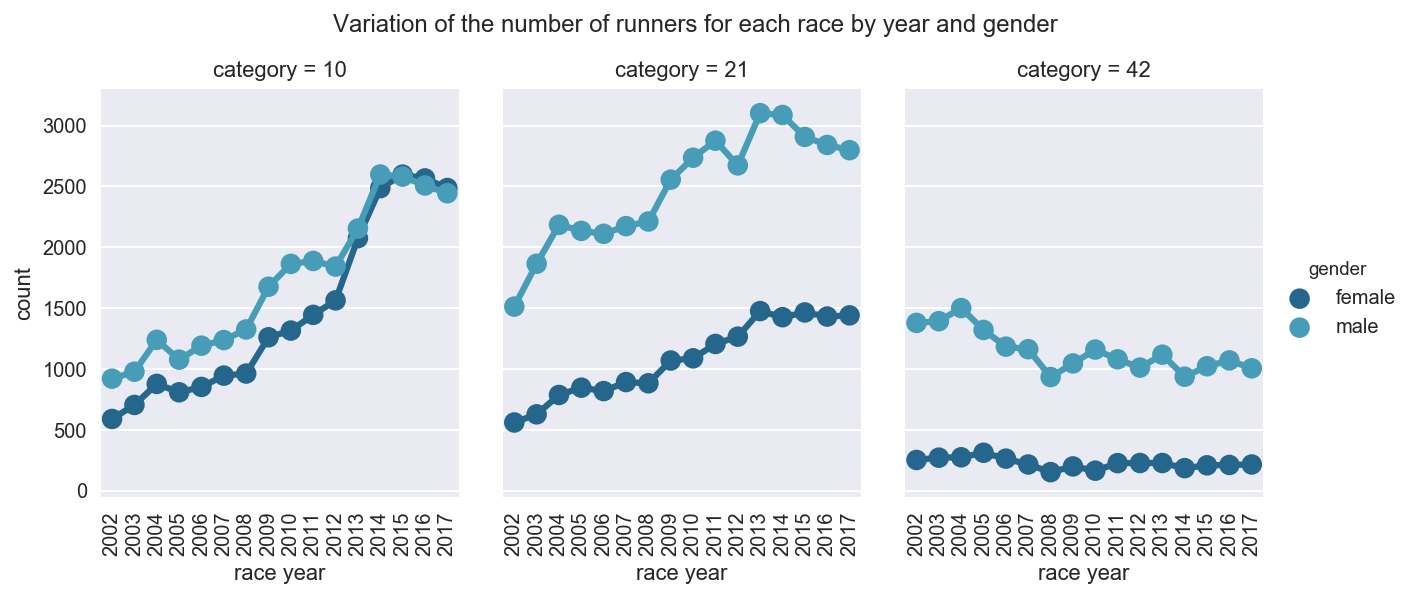

In [21]:
g = sns.factorplot(
    x="race year", 
    y="count", 
    hue="gender", 
    col="category", 
    data=df_count_by_year_cat_gender,
    capsize=.2, 
    palette="YlGnBu_d",
    size=4,
    aspect=.75
)
g.fig.subplots_adjust(top=0.85)
g.set_xticklabels(rotation=90)
g.fig.suptitle('Variation of the number of runners for each race by year and gender')

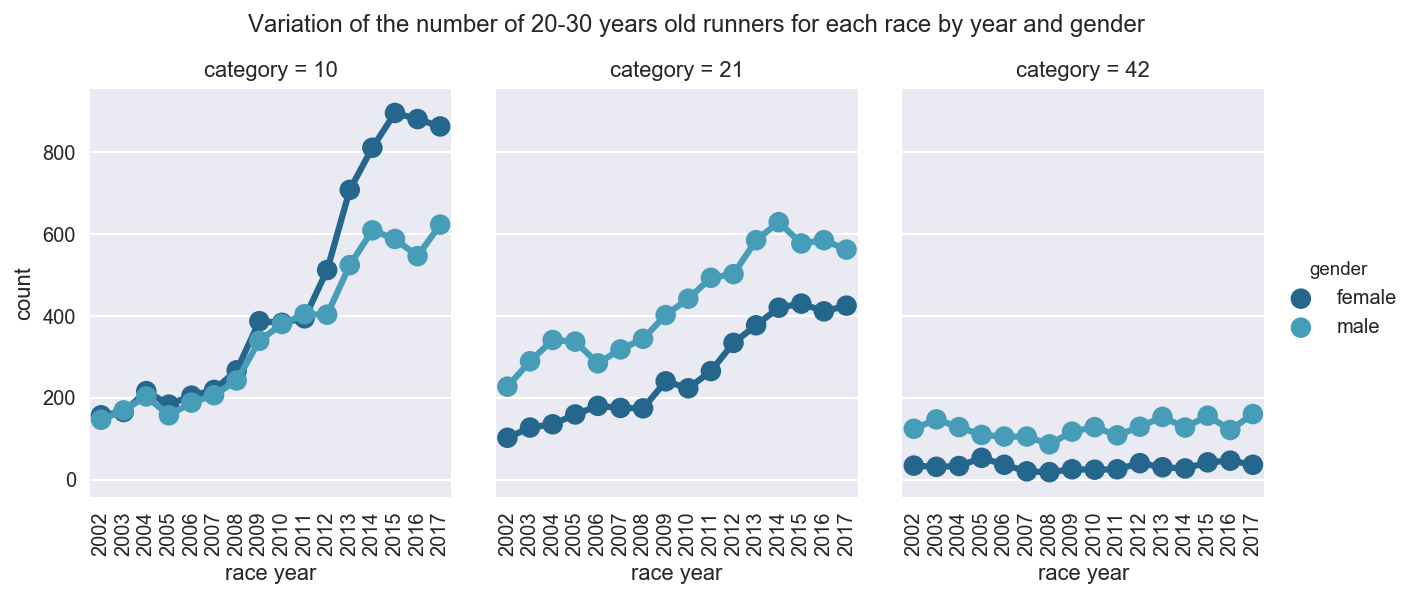

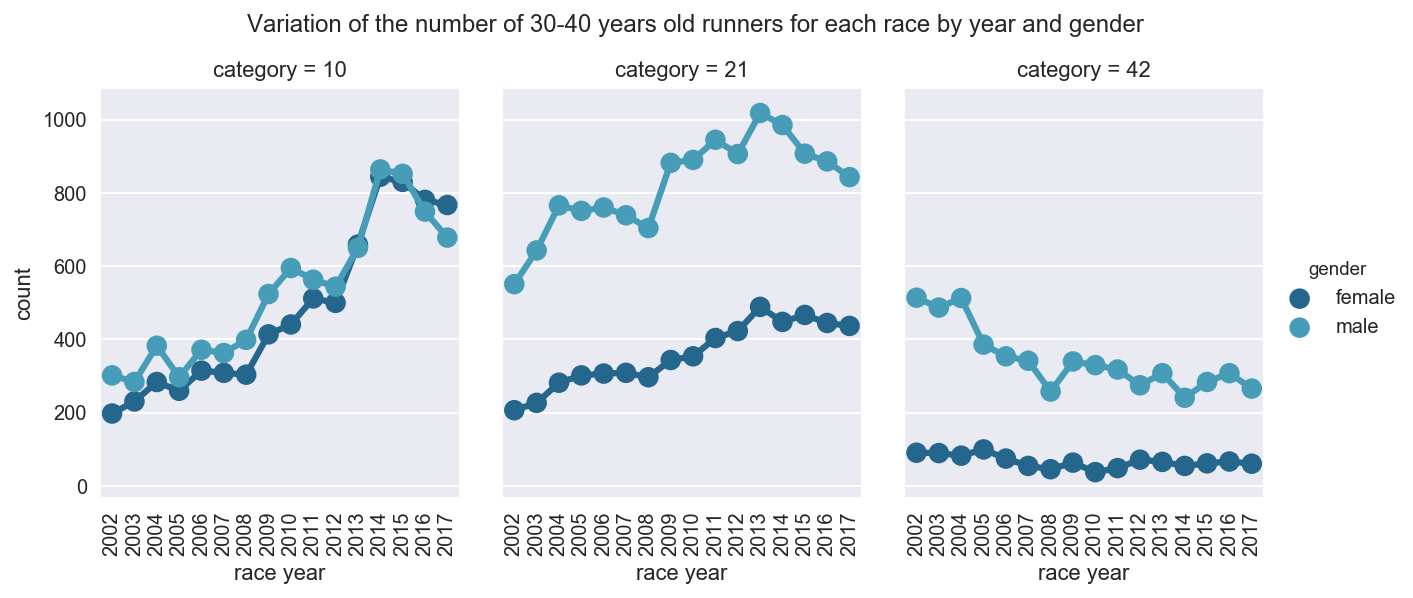

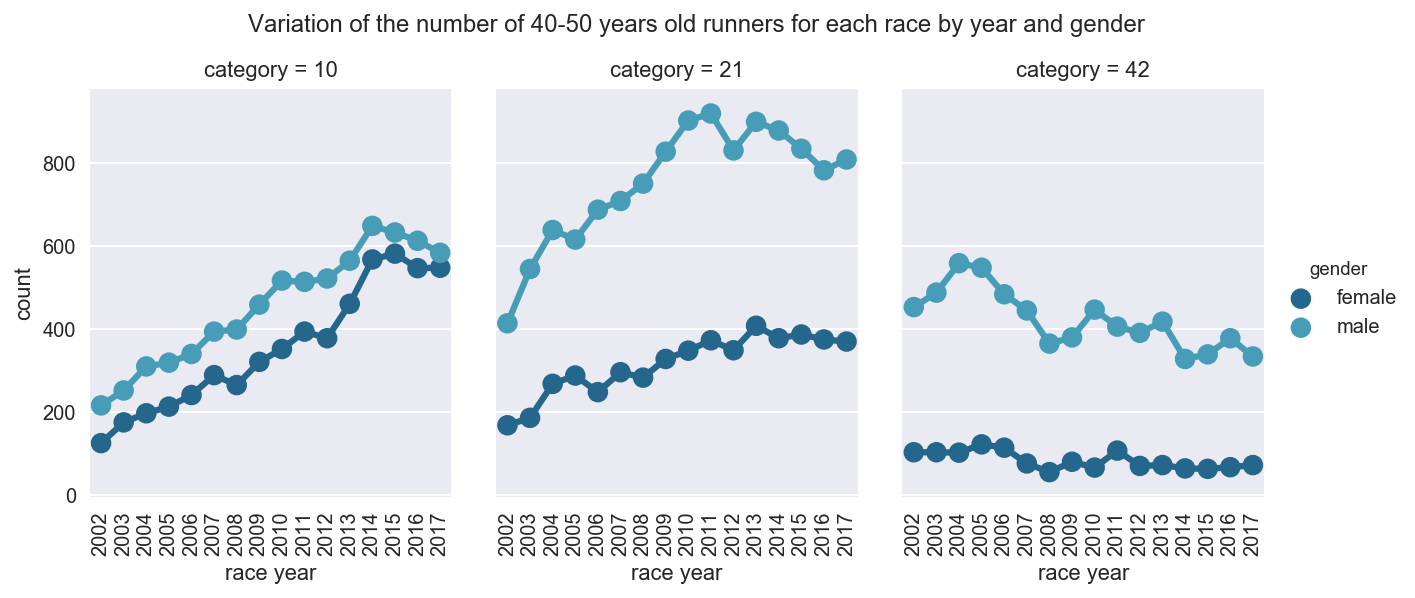

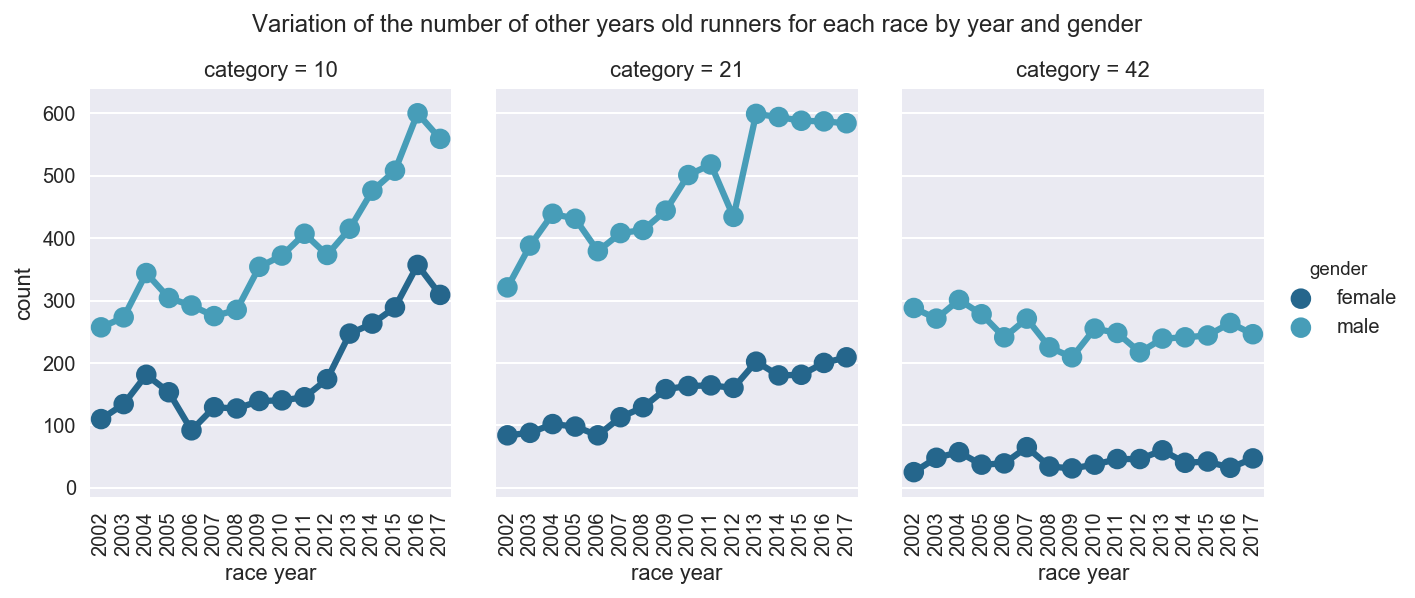

In [25]:
# Group by
df_count_by_year_cat_age_gender = pd.DataFrame(df_marathon.groupby(['race year','category','age group','gender'])['name'].count())
df_count_by_year_cat_age_gender.columns = ['count']
df_count_by_year_cat_age_gender = df_count_by_year_cat_age_gender.reset_index()

def factorplot_by_age_group(age_group):
    g = sns.factorplot(x="race year", y="count", hue="gender", col="category", 
                   data=df_count_by_year_cat_age_gender[df_count_by_year_cat_age_gender['age group']==age_group],
                   capsize=.2, palette="YlGnBu_d", size=4, aspect=.75)
    g.fig.subplots_adjust(top=0.85)
    g.set_xticklabels(rotation=90)
    g.fig.suptitle('Variation of the number of '+ age_group + ' years old runners for each race by year and gender')
    
# Age group 20-30
factorplot_by_age_group('20-30')
# Age group 30-40
factorplot_by_age_group('30-40')
# Age group 40-50
factorplot_by_age_group('40-50')
# Other age group
factorplot_by_age_group('other')

---
### Performance comparison (best, worst and average performance for each year) (Performance bar charts)

In this part, we plot the variation of the fastest/slowest runner performance and the average run time over year by race and gender. We can easily observe that the variation of the best and worst performence change a lot over year. The averge run time, however, doesn't vary so much.

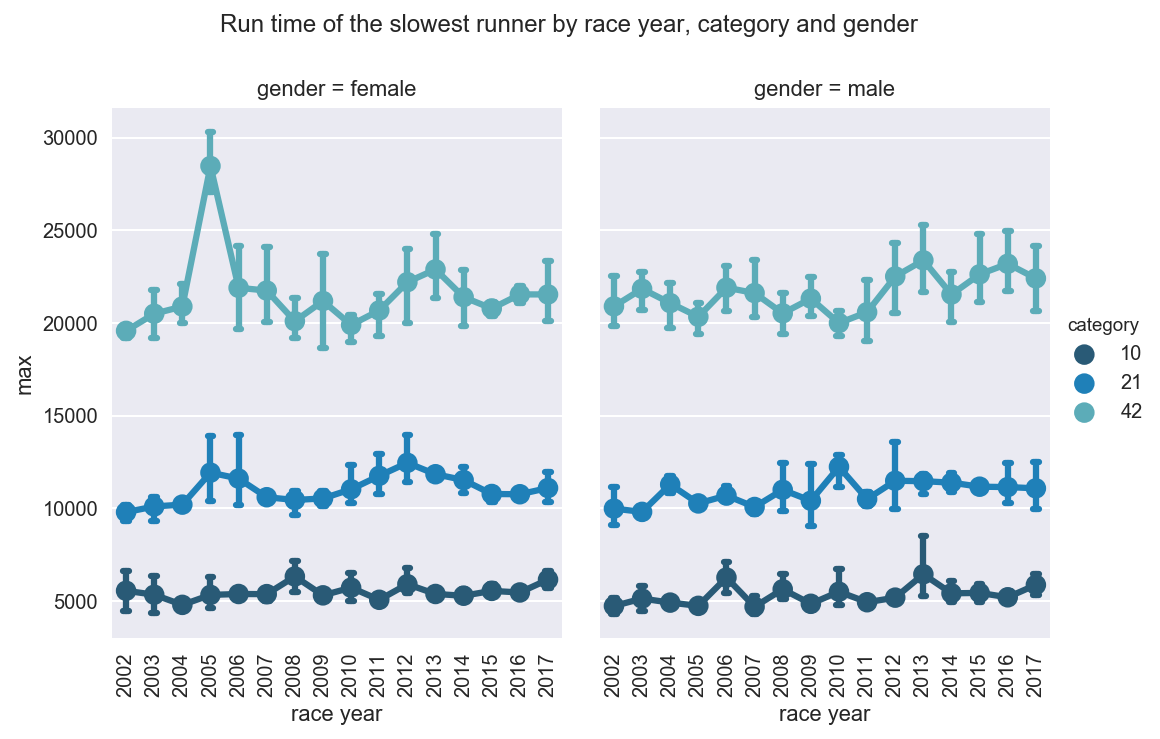

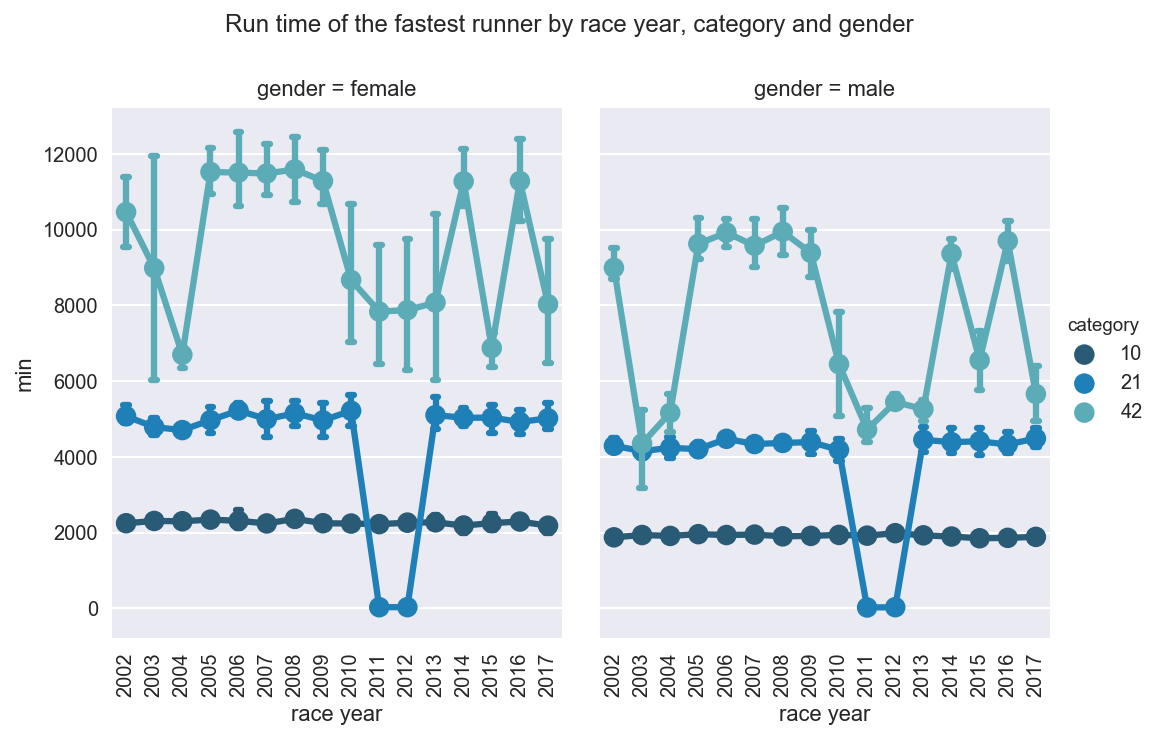

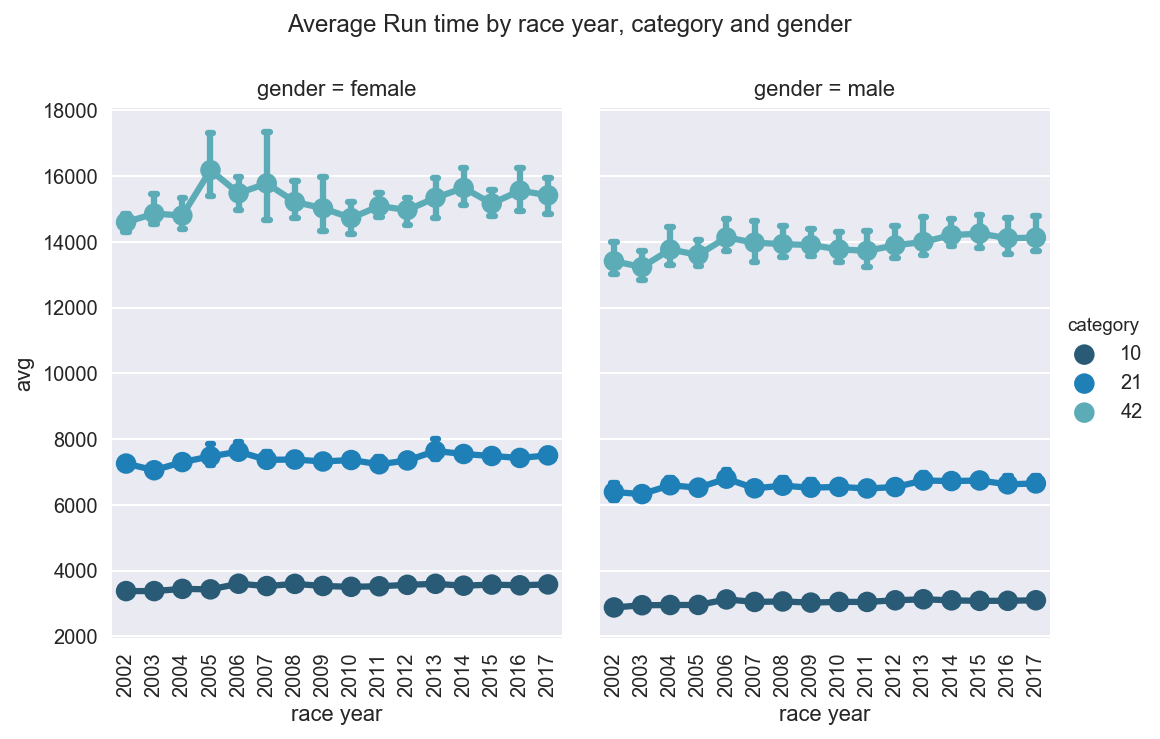

In [27]:
# Load data
df_max_min_avg = pd.read_csv('../data/marathon_max_min_avg.csv')

def factorplot_by_runtime(type_, title):
    g = sns.factorplot(x="race year", y=type_, hue="category", col="gender", data=df_max_min_avg,
                   capsize=.2, palette="YlGnBu_d", size=5, aspect=.75)
    g.fig.subplots_adjust(top=0.85)
    g.set_xticklabels(rotation=90)
    g.fig.suptitle(title)

# Slowest runner
factorplot_by_runtime(type_ = "max", 
                      title = "Run time of the slowest runner by race year, category and gender")
# Fastest runner
factorplot_by_runtime(type_ = "min", 
                      title = "Run time of the fastest runner by race year, category and gender")
# Average run time
factorplot_by_runtime(type_ = "avg", 
                      title = "Average Run time by race year, category and gender")

---
### City of top runners distribution (map page for top10 menu)

In this part, we compute the number of cities that the top 10 female and male runner of each age group come from scaling from 2002 to 2017. From the result, we can find that those best runners doesn't always come from the same city. Hence, we are curious to know the best runner's geographical distribution over year and expect to observe more insights with the help of map.

In [130]:
# Load data
df_top10 = pd.read_csv('../data/marathon_top10.csv')

age_groups = ['20-30','30-40','40-50','other']
genders = ['male','female']
categories = [42,21,10]

print("From 2002 to 2017,")
for age_group in age_groups:
    print("\tFor age group "+age_group+",")
    for category in categories:
        for gender in genders:
            count = len(set(df_top10[(df_top10['age group']==age_group) 
                                     & (df_top10['gender']==gender) 
                                     & (df_top10['category']==category)]['city']))
            print("\t\tTop 10 "+gender+" runners of "+str(category)+"km marathon come from "+str(count)+ " different cities.")

From 2002 to 2017,
	For age group 20-30,
		Top 10 male runners of 42km marathon come from 109 different citys.
		Top 10 female runners of 42km marathon come from 105 different citys.
		Top 10 male runners of 21km marathon come from 103 different citys.
		Top 10 female runners of 21km marathon come from 97 different citys.
		Top 10 male runners of 10km marathon come from 83 different citys.
		Top 10 female runners of 10km marathon come from 89 different citys.
	For age group 30-40,
		Top 10 male runners of 42km marathon come from 124 different citys.
		Top 10 female runners of 42km marathon come from 108 different citys.
		Top 10 male runners of 21km marathon come from 113 different citys.
		Top 10 female runners of 21km marathon come from 106 different citys.
		Top 10 male runners of 10km marathon come from 89 different citys.
		Top 10 female runners of 10km marathon come from 95 different citys.
	For age group 40-50,
		Top 10 male runners of 42km marathon come from 139 different citys

---
### Country distribution

At the very beginning, we find that there are 93 countries which have participated in the Lausanne marathon competition for at least one time since 2002, but most of the countries dont' have so many participants. With curiosity, we decide to have a look at thr country distribution of this competition in order to obtain some more profound insights.

In this part, we mainly do a statitical analysis aim at the countries which have at least 100 runners participated in the competition over the past 16 years.

In [257]:
# Get total number of runners for each country
df_country = df_marathon.groupby(['country']).count()
df_country.sort_values(['name'],ascending=False,inplace=True)

# Gather countries whose number of runners is larger than 100
df_country = pd.DataFrame(df_country[df_country['name'] >= 100]['name'])
df_country.columns = ['count runner']

# List of countries
countries = df_country.index

In [260]:
# Group the DF by race year and country
df_year = df_marathon.groupby(['race year','country']).count()
df_year = pd.DataFrame(df_year['name'])
df_year.reset_index(inplace=True)

# Get the number of years that each country has participated in the race
dict_year_count = dict(df_year['country'].value_counts())

count_years = []
for country in countries:
    count_years.append(dict_year_count[country])
df_country['count year'] = count_years

In [264]:
# Group the DF by race year and gender
df_gender = df_marathon.groupby(['country','gender']).count()
df_gender = pd.DataFrame(df_gender['name'])
df_gender.columns = ['count']
df_gender.reset_index(inplace=True)

df_male = df_gender[df_gender['gender'] == 'male']
df_male.set_index(['country'],inplace=True)

# Get the number of male runners for each country
dict_male_count = dict(df_male['count'])

count_male = []
for country in countries:
    count_male.append(dict_male_count[country])
df_country['count male'] = count_male
df_country['count female'] = df_country['count runner'] - df_country['count male']

In [323]:
# Get best rank for each country
df_rank = df_marathon.groupby(['race year','category','age group','gender']).apply(lambda x: x.sort_values(['time by secs']))
df_rank.drop(['race year','category','age group','gender'],axis=1,inplace=True)
df_rank.reset_index(inplace=True)
df_rank.drop(['level_4'],axis=1,inplace=True)
df_rank['new rank'] = 0

years = set(df_rank['race year'])
categories = set(df_rank['category'])
age_groups = set(df_rank['age group'])
genders = set(df_rank['gender'])

for year in years:
    for category in categories:
        for age_group in age_groups:
            for gender in genders:
                list_index = df_rank[(df_rank['race year']==year)&(df_rank['category']==category)&(df_rank['age group']==age_group)&(df_rank['gender']==gender)].index
                df_rank.loc[list_index,'new rank'] = range(1,len(list_index)+1)
                
df_rank = df_rank.groupby(['country'])['new rank','race year','category','age group','gender'].min()

best_rank = []
for country in countries:
    best_rank.append(df_rank.loc[country]['new rank'])
df_country['best rank'] = best_rank

In [339]:
df_country

,count runner,count year,count male,count female,best rank
country,,,,,
CH,101041,16,65230,35811,1
FR,17640,16,12761,4879,1
US,4035,16,2699,1336,1
DE,1580,16,1079,501,1
IT,969,16,705,264,1
GB,819,16,505,314,1
BE,607,16,415,192,1
CA,514,16,310,204,1
ZA,420,16,310,110,6


---
### Basic analysis for runner performance

In [28]:
df = pd.read_csv('../data/marathon_data.csv', index_col=0)
df['time'] = df['time'].str.replace(r'^(\d:\d\d\.\d)$', r'00:0\1')
df['time'] = df['time'].str.replace(r'^(\d\d:\d\d\.\d)$', r'00:\1')
df['time'] = df['time'].str.replace(r'^(\d:\d\d:\d\d\.\d)$', r'0\1')
df['time'] = pd.to_timedelta(df['time'])/ np.timedelta64(1, 'm')
df['time per km'] = df['time']/df['category']

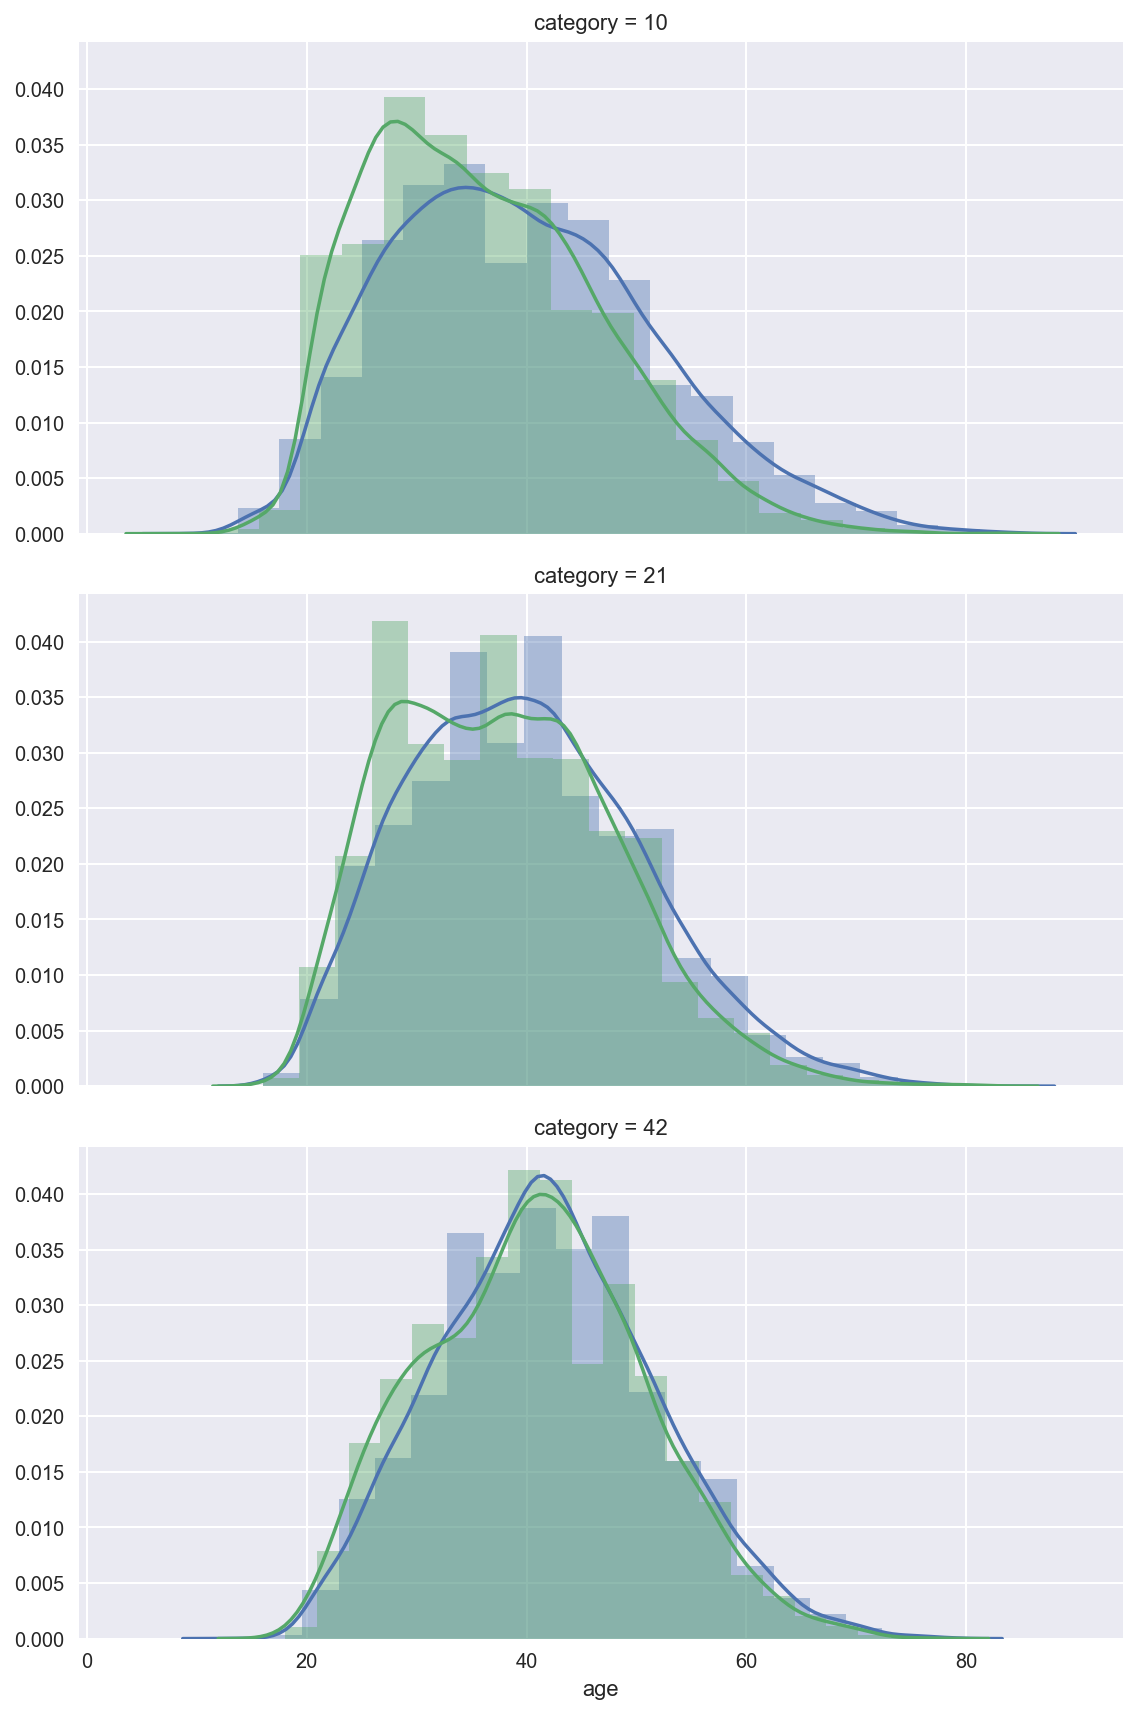

In [29]:
g = sns.FacetGrid(df, row='category', hue='gender', size=4, aspect=2)
g.map(sns.distplot, *['age'], **{"bins" : 20})

(2, 11)

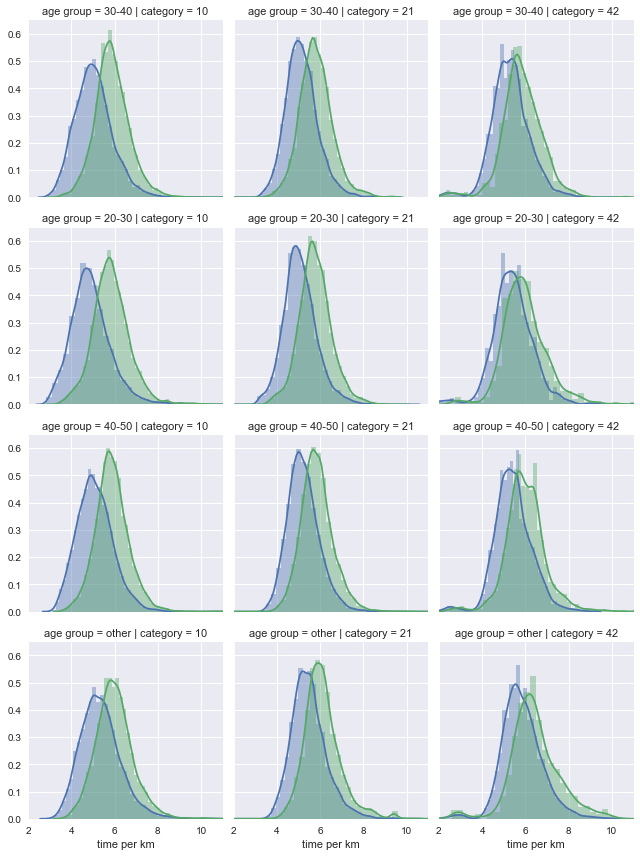

In [6]:
g = sns.FacetGrid(df, col='category', row='age group', hue='gender')
g.map(sns.distplot, 'time per km')
plt.xlim(2, 11)

In [7]:
df.groupby(['category', 'gender']).mean()[['age', 'time', 'time per km']]

age        time  time per km
category gender                                    
10       female  36.104541   58.812040     5.881204
         male    39.725823   50.911684     5.091168
21       female  37.872100  122.882337     5.851540
         male    39.917075  109.692579     5.223456
42       female  40.794801  253.291125     6.030741
         male    41.880020  230.259848     5.482377

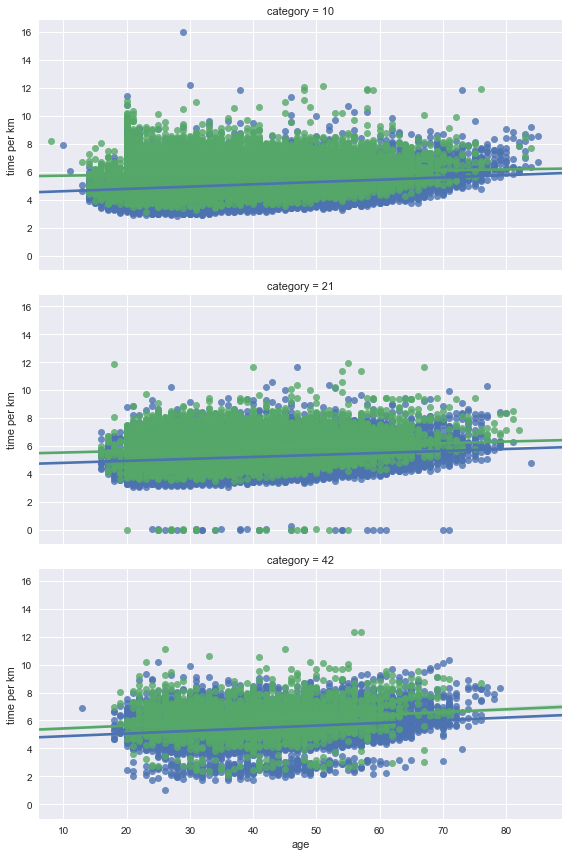

In [8]:
g = sns.FacetGrid(df, row='category', size=4, aspect=2, hue='gender')
g.map(sns.regplot, 'age', 'time per km')

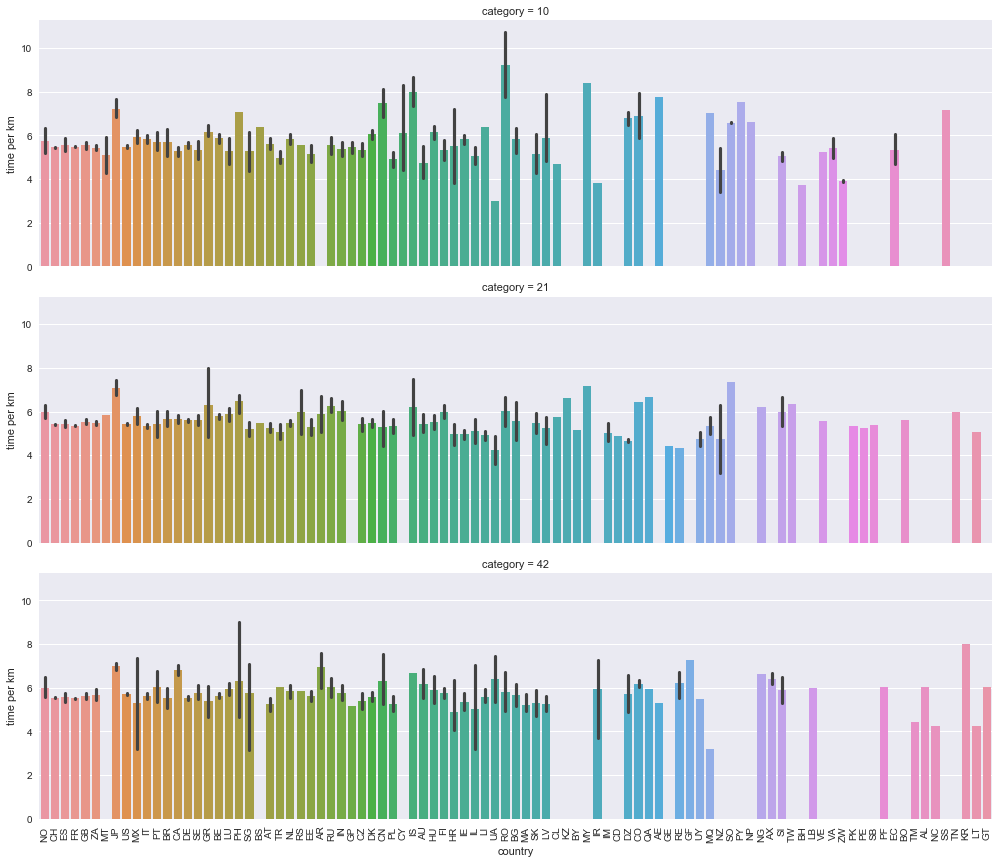

In [10]:
g = sns.factorplot(
    x = 'country',
    y = 'time per km',
    data = df,
    row = 'category',
    kind = 'bar',
    size = 4,
    aspect = 3.5
)
for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=90)